## Day 12

https://adventofcode.com/2024/day/12

In [1]:
from collections import defaultdict

def read_input_12(filaname):
    flowers = defaultdict(int)
    flowervalues = {}
    f = open(filename)
    im = 1j
    fv = 0
    for j,l in enumerate(f.readlines()):
        for i,f in enumerate(l.strip()):
            if f in flowervalues.keys():
                flowers[i+im*j] = flowervalues[f]
            else:
                fv -= 1
                flowervalues[f] = fv
                flowers[i+im*j] = fv
    flowernames = {n:v  for v,n in flowervalues.items() }
    return flowers, flowernames

In [4]:
def explore_patch(p,fv,grid,patch=[]):
    if fv<0:
        grid[p] = -fv
        patch.append(p)
        for p1 in [p+1,p-1,p+1j,p-1j]:
            if grid[p1]<0:
                if grid[p1]==fv:
                    patch1 = explore_patch(p1,fv,grid,patch)
        return patch
    return []

def find_patches(flowers, flowernames):
    patches = []
    for p in list(flowers.keys()):
        if flowers[p]<0:
            name = flowernames[flowers[p]]
            patch = explore_patch(p,flowers[p],flowers,[])
            patches.append(patch)
    return patches

def perimeter(patch):
    per = 0
    for p in patch:
        per += 4 - sum([1 for p1 in [p+1,p-1,p+1j,p-1j] if p1 in patch])
    return per
    
def part1(filename):
    flowers, flowernames = read_input_12(filename)
    patches = find_patches(flowers, flowernames)
    price = 0
    for p in patches:
        price += len(p)*perimeter(p)
    return price

In [5]:
filename = "examples/example12-1.txt"
part1(filename)

140

In [6]:
filename = "examples/example12-2.txt"
part1(filename)

1930

In [7]:
filename = "AOC2024inputs/input12.txt"
part1(filename)

1304764

In [8]:
from itertools import combinations
from collections import Counter

def find_corners(p):
    # find all square vertices, some will be shared between squares
    corners = defaultdict(list)
    for s in p:
        for v in [s-0.5-0.5j, s+0.5-0.5j, s+0.5+0.5j, s-0.5+0.5j]:
            corners[v].append(s)

    # vertices with odd count are corners, but since patch are not all 
    # convex, I need to correct count for corners shared by diagonal-only 
    # neighbors (it'd be two, but won't be counted)
    for v,s in corners.items():
        if len(s)==2:
            ds = s[0]-s[1]
            if ds.real!=0 and ds.imag!=0: # diagonal
                corners[v].pop(0)

    return [v for v,s in corners.items() if len(s)%2==1]

def count_sides(p):
    # for convex polygons, number of sides is equal to number of vertices
    
    # find all square vertices, some will be shared between squares
    corners = defaultdict(list)
    for s in p:
        for v in [s-0.5-0.5j, s+0.5-0.5j, s+0.5+0.5j, s-0.5+0.5j]:
            corners[v].append(s)

    # vertices with odd count are corners, but since patch are not all 
    # convex, I need to correct count for corners shared by diagonal-only 
    # neighbors (it'd be two, but won't be counted. At the same time, for 
    # those corners I need to count 2 sides! 
    diagcorners = 0
    for v,s in corners.items():
        if len(s)==2:
            ds = s[0]-s[1]
            if ds.real!=0 and ds.imag!=0: # diagonal
                diagcorners += 1
                corners[v].pop(0)

    return sum([1 for v,s in corners.items() if len(s)%2==1])+diagcorners

def part2(filename):
    flowers, flowernames = read_input_12(filename)
    patches = find_patches(flowers, flowernames)
    return sum([len(p)*count_sides(p) for p in patches])

In [9]:
filename = "examples/example12-1.txt"
part2(filename)

80

In [10]:
filename = "examples/example12-2.txt"
part2(filename)

1206

In [11]:
filename = "AOC2024inputs/input12.txt"
part2(filename)

811148

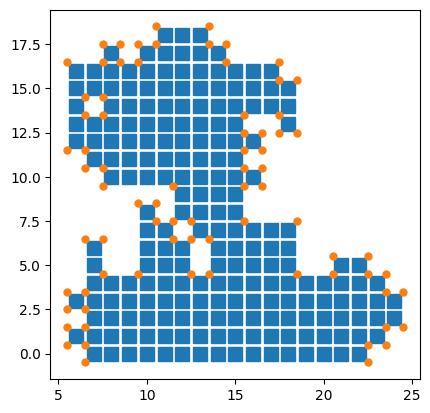

In [22]:
import numpy as np
import matplotlib.pyplot as plt

filename = "AOC2024inputs/input12.txt"
flowers, flowernames = read_input_12(filename)
patches = find_patches(flowers, flowernames)

p = patches[1]

x = [int(z.real) for z in p]
y = [int(z.imag) for z in p]

plt.plot(x,y,marker="s",linestyle='None', markersize=10)

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

xc = [ z.real for z in find_corners(p) ] 
yc = [ z.imag for z in find_corners(p) ] 

plt.plot(xc,yc,marker=".",linestyle='None', markersize=10)